# Linear Regression Project

You just got some contract work with an Ecommerce company based in New York City that sells clothing online but they also have in-store style and clothing advice sessions. Customers come in to the store, have sessions/meetings with a personal stylist, then they can go home and order either on a mobile app or website for the clothes they want.

The company is trying to decide whether to focus their efforts on their mobile app experience or their website. They've hired you on contract to help them figure it out! Let's get started!

## Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Get the Data

We'll work with the Ecommerce Customers csv file from the company. It has Customer info, suchas Email, Address, and their color Avatar. Then it also has numerical value columns:

* Avg. Session Length: Average session of in-store style advice sessions.
* Time on App: Average time spent on App in minutes
* Time on Website: Average time spent on Website in minutes
* Length of Membership: How many years the customer has been a member. 

In [6]:
df = pd.read_csv('Ecommerce Customers')

In [7]:
df.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [9]:
df.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


## Exploratory Data Analysis

**Let's explore the data!**

We'll only be using the numerical data of the csv file.
___
**Jointplot to compare the Time on Website and Yearly Amount Spent columns.**

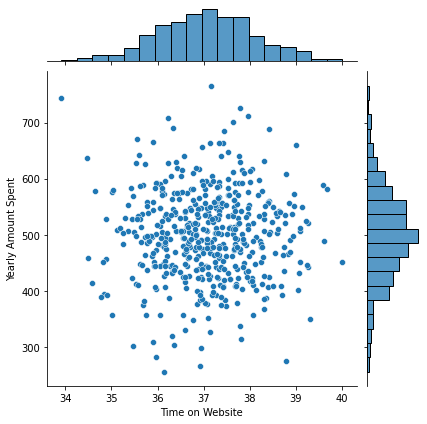

In [10]:
sns.jointplot(data=df, x="Time on Website", y="Yearly Amount Spent")

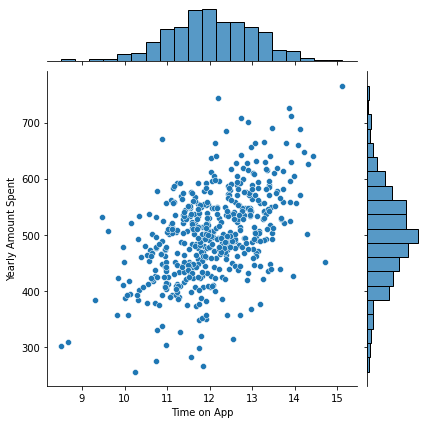

In [11]:
sns.jointplot(data=df, x="Time on App", y="Yearly Amount Spent")

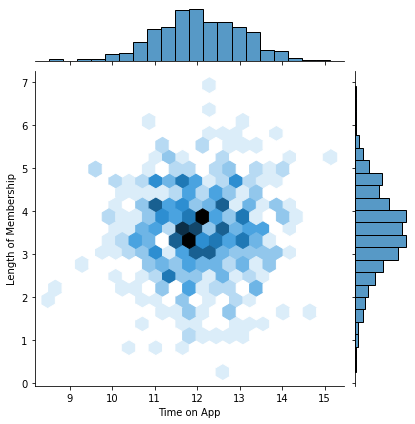

In [12]:
sns.jointplot(data=df, x="Time on App", y="Length of Membership", kind="hex")

**Let's explore these types of relationships across the entire data set.**

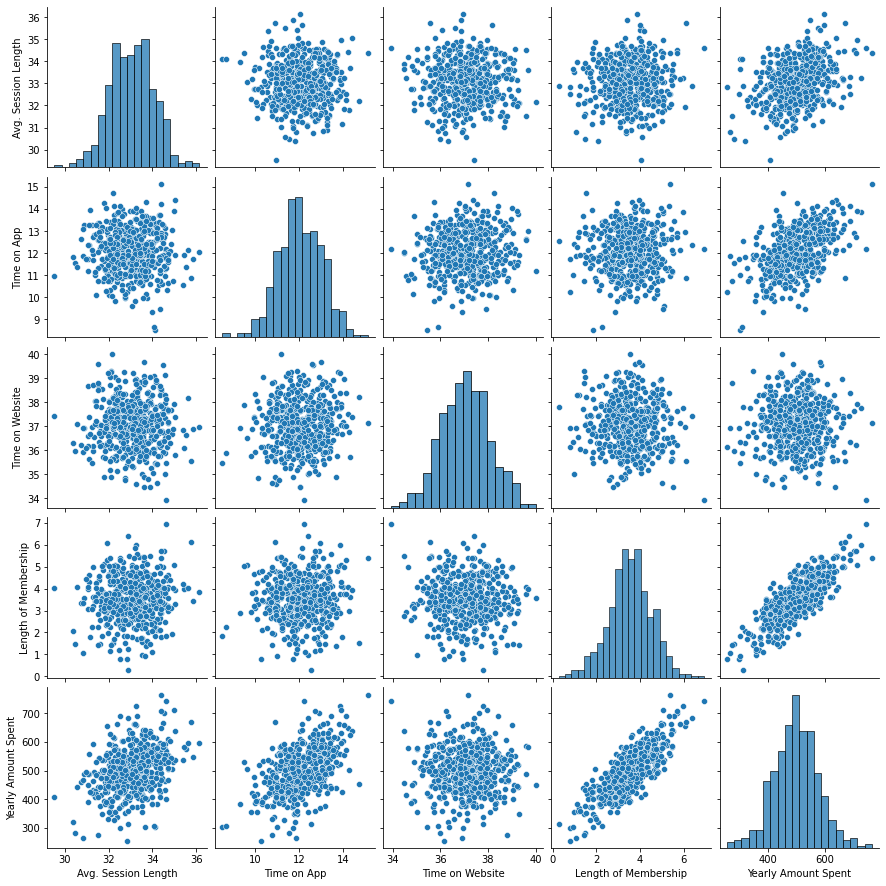

In [13]:
sns.pairplot(df)

**Linear model plot of Yearly Amount Spent vs. Length of Membership.**

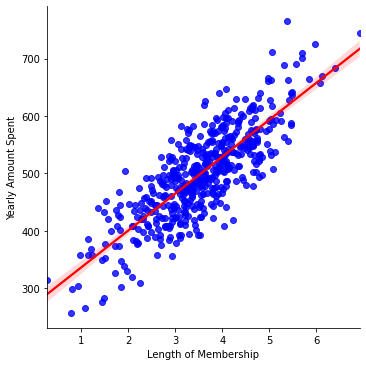

In [14]:
sns.lmplot(data=df, x='Length of Membership', y='Yearly Amount Spent', scatter_kws={"color": "blue"}, line_kws={"color": "red"})

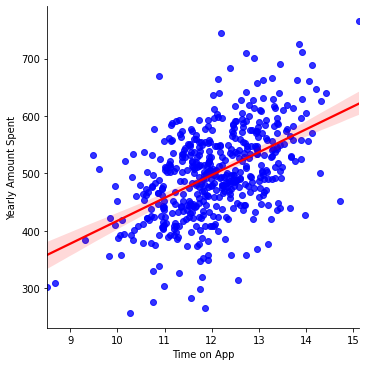

In [15]:
sns.lmplot(data=df, x='Time on App', y='Yearly Amount Spent', scatter_kws={"color": "blue"}, line_kws={"color": "red"})

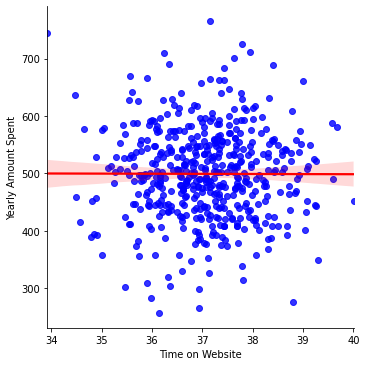

In [16]:
sns.lmplot(data=df, x='Time on Website', y='Yearly Amount Spent', scatter_kws={"color": "blue"}, line_kws={"color": "red"})

## Training and Testing Data

Now that we've explored the data a bit, let's go ahead and split the data into training and testing sets.

In [17]:
df.columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

In [18]:
X = df[['Avg. Session Length', 'Time on App', 'Time on Website', 'Length of Membership']]

In [19]:
y = df['Yearly Amount Spent']

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

## Training the Model

Now its time to train our model on our training data!

In [22]:
from sklearn.linear_model import LinearRegression

In [23]:
lm = LinearRegression()

** Train/fit lm on the training data.**

In [24]:
lm.fit(X_train, y_train)

LinearRegression()

In [25]:
lm.coef_

array([25.98154972, 38.59015875,  0.19040528, 61.27909654])

## Predicting Test Data
Now that we have fit our model, let's evaluate its performance by predicting off the test values!

** Use lm.predict() to predict off the X_test set of the data.**

In [26]:
predictions = lm.predict(X_test)

** Create a scatterplot of the real test values versus the predicted values. **

Text(0, 0.5, 'Predicted Values')

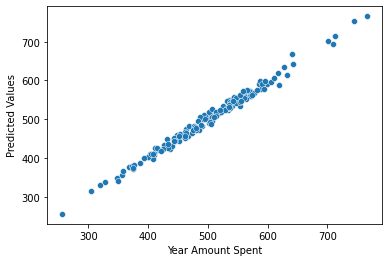

In [27]:
sns.scatterplot(x=y_test, y=predictions)
plt.xlabel('Year Amount Spent')
plt.ylabel('Predicted Values')

## Evaluating the Model

Let's evaluate our model performance by calculating the residual sum of squares and the explained variance score (R^2).

In [28]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import explained_variance_score

In [29]:
print("MAE: ", mean_absolute_error(y_true=y_test, y_pred=predictions))
print("MSE: ", mean_squared_error(y_true=y_test, y_pred=predictions))
print("RMSE: ", np.sqrt(mean_squared_error(y_true=y_test, y_pred=predictions)))

MAE:  7.228148653430826
MSE:  79.81305165097427
RMSE:  8.933815066978624


In [30]:
explained_variance_score(y_test, predictions)

0.9890771231889606

## Residuals

Let's quickly explore the residuals to make sure everything was okay with our data. 

E:\Travail\Projets\Ecommerce-analysis\venv\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Yearly Amount Spent', ylabel='Density'>

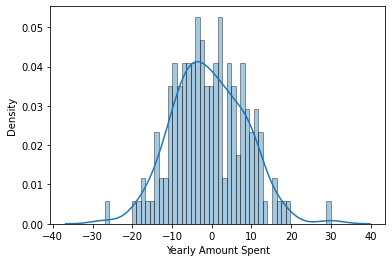

In [37]:
sns.distplot((y_test - predictions), bins=50, hist_kws=dict(edgecolor="black", linewidth=1))

## Conclusion
We still want to figure out the answer to the original question, do we focus our efforst on mobile app or website development? Or maybe that doesn't even really matter, and Membership Time is what is really important.  Let's see if we can interpret the coefficients at all to get an idea.

In [32]:
cdf = pd.DataFrame(lm.coef_, X.columns, columns=['Coeff'])

In [33]:
cdf

,Coeff
Avg. Session Length,25.981550
Time on App,38.590159
Time on Website,0.190405
Length of Membership,61.279097
